<h1 style="color:DarkTurquoise"> Exploratory Notebook </h1> 

Note: Please make sure to select the conda kernel. Otherwise, this won't work correctly (`statsmodels` is not 
installed in my base `/usr` root)

Import necessary package dependencies

In [9]:
import pandas as pd
import statsmodels
import os

In [2]:
import sys

sys.prefix

'/home/jjl20011/miniconda3'

In [10]:
data_path = "../../data/InsNova_data_2023_train.csv"

data = pd.read_csv(data_path)

initial dataframe exploration (variable exploration)

In [24]:
data.head().T

0           1           2           3  \
id                              1           2           3           4   
veh_value                    0.77        4.45         4.9        0.48   
exposure                 0.444504    0.562183    0.465244    0.271039   
veh_body                    SEDAN       STNWG       STNWG       PANVN   
veh_age                         4           1           1           4   
gender                          M           M           F           M   
area                            D           A           A           A   
agecat                          3           3           3           4   
engine_type                petrol      petrol      petrol      petrol   
max_power                     147         158         159          80   
driving_history_score        67.0        76.0        58.0        72.0   
veh_color                   black       white       black       white   
marital_status                  S           S           M           S   
e_bill                          1           1           1           1   
time_of_week_driven       weekday     weekday     weekday     weekday   
time_driven            6pm - 12am  6am - 12pm  6pm - 12am  12pm - 6pm   
trm_len                         6          12           6          12   
credit_score           640.448137  683.749691  653.656117  642.574671   
high_education_ind            1.0         0.0         1.0         0.0   
clm                             0           0           0           0   
numclaims                       0           0           0           0   
claimcst0                     0.0         0.0         0.0         0.0   

                                4  
id                              5  
veh_value                    0.85  
exposure                 0.141624  
veh_body                    SEDAN  
veh_age                         4  
gender                          F  
area                            A  
agecat                          5  
engine_type                petrol  
max_power                     126  
driving_history_score        91.0  
veh_color                   white  
marital_status                  S  
e_bill                          0  
time_of_week_driven       weekday  
time_driven            6am - 12pm  
trm_len                         6  
credit_score           647.175035  
high_education_ind            0.0  
clm                             0  
numclaims                       0  
claimcst0                     0.0

In [23]:
data.describe().T

count          mean          std         min  \
id                     22619.0  11310.000000  6529.687205    1.000000   
veh_value              22619.0      1.868948     1.278588    0.000000   
exposure               22619.0      0.433038     0.272899    0.001754   
veh_age                22619.0      2.667492     1.070555    1.000000   
agecat                 22619.0      3.481675     1.420252    1.000000   
max_power              22619.0    152.447765    51.834156   60.000000   
driving_history_score  22619.0     70.868341    19.083318    1.000000   
e_bill                 22619.0      0.636810     0.480930    0.000000   
trm_len                22619.0     10.493833     2.601685    6.000000   
credit_score           22619.0    649.875077    10.515364  607.797435   
high_education_ind     22619.0      0.117114     0.321563    0.000000   
clm                    22619.0      0.068173     0.252048    0.000000   
numclaims              22619.0      0.073124     0.280142    0.000000   
claimcst0              22619.0    163.048084  1271.955238    0.000000   

                               25%           50%           75%           max  
id                     5655.500000  11310.000000  16964.500000  22619.000000  
veh_value                 1.070000      1.570000      2.260000     24.510000  
exposure                  0.203696      0.384313      0.643316      0.999378  
veh_age                   2.000000      3.000000      4.000000      4.000000  
agecat                    2.000000      3.000000      5.000000      6.000000  
max_power               115.000000    144.000000    180.000000    409.000000  
driving_history_score    58.000000     72.000000     86.000000     99.000000  
e_bill                    0.000000      1.000000      1.000000      1.000000  
trm_len                   6.000000     12.000000     12.000000     12.000000  
credit_score            643.134748    647.180197    654.069205    790.360253  
high_education_ind        0.000000      0.000000      0.000000      1.000000  
clm                       0.000000      0.000000      0.000000      1.000000  
numclaims                 0.000000      0.000000      0.000000      3.000000  
claimcst0                 0.000000      0.000000      0.000000  57895.584560

**Insights**: 
Based on the summary, it looks as if the `claimscst0` variable, which indicates the claim cost. 
There are 22,619 samples in the data set. This should be sufficient to train a simple neural network 
if we wanted to. There is likely good actuarial research on building statistical claims models. These
could be good to look into as well. 

I think, the best place to start would be just to start with a general linear model (ie. multiple linear regression anova and analyze the goodness of the linear fit)

<h3 style="color:LightSalmon"> Bing AI Help </h3> 

Use the following to check the anova stuff

```
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
type_iii_ss = model.ess
type_i_ss = model.ess - model.resid_ss

```

In [7]:
import statsmodels.api as sm

# the `endog` variable is the dependent (response) variable
# `exog` is the independent variable(s) - predictor variables
model = sm.OLS(endog=data['claimcst0'], exog=data['veh_value']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              claimcst0   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):              0.011
Method:                 Least Squares   F-statistic:                              259.7
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                    4.21e-58
Time:                        13:58:23   Log-Likelihood:                     -1.9384e+05
No. Observations:               22619   AIC:                                  3.877e+05
Df Residuals:                   22618   BIC:                                  3.877e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
veh_value     60.3350      3.744     16.115      0.000      52.996      67.673
==============================================================================
Omnibus:                    47232.484   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        250639553.131
Skew:                          17.887   Prob(JB):                         0.00
Kurtosis:                     517.454   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
import statsmodels.formula.api as smf

model2 = smf.ols(formula="clm ~ driving_history_score", data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    clm   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.510
Date:                Fri, 03 Nov 2023   Prob (F-statistic):              0.219
Time:                        14:45:47   Log-Likelihood:                -921.64
No. Observations:               22619   AIC:                             1847.
Df Residuals:                   22617   BIC:                             1863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0605      0.006      9.390      0.000       0.048       0.073
driving_history_score     0.0001   8.78e-05      1.229      0.219   -6.42e-05       0.000
==============================================================================
Omnibus:                    15413.691   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           133672.877
Skew:                           3.426   Prob(JB):                         0.00
Kurtosis:                      12.740   Cond. No.                         282.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

So far, I found that the variables `high_education_ind` and `exposure` are perhaps the most 
significant. I still need to confirm that a linear model actually fits this data adequately 
though. I feel like we might need to do a significant amount of feature engineering for 
this dataset to get a good result.

In [ ]:
import seaborn as sns

sns.set_theme()

tips = sns.load_dataset("tips")

sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time", 
    hue="smoker", style="smoker", size="size"
)

In [ ]:
dots = sns.load_dataset("dots")
sns.relplot(
    data = dots, kind="line", 
    x = "time", y="firing_rate", col="align", 
    hue="choice", size="coherence", style="choice", 
    facet_kws=dict(sharex=False),
)

Note that the `size` and `style` parameters are used in both scatter and line plots, but they affect the two visualizations differently. 

Seaborn can use bootsrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate. 

Enhance a scatterplot by including a linear regression model and its uncertainty

/home/jjl20011/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjl20011/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jjl20011/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


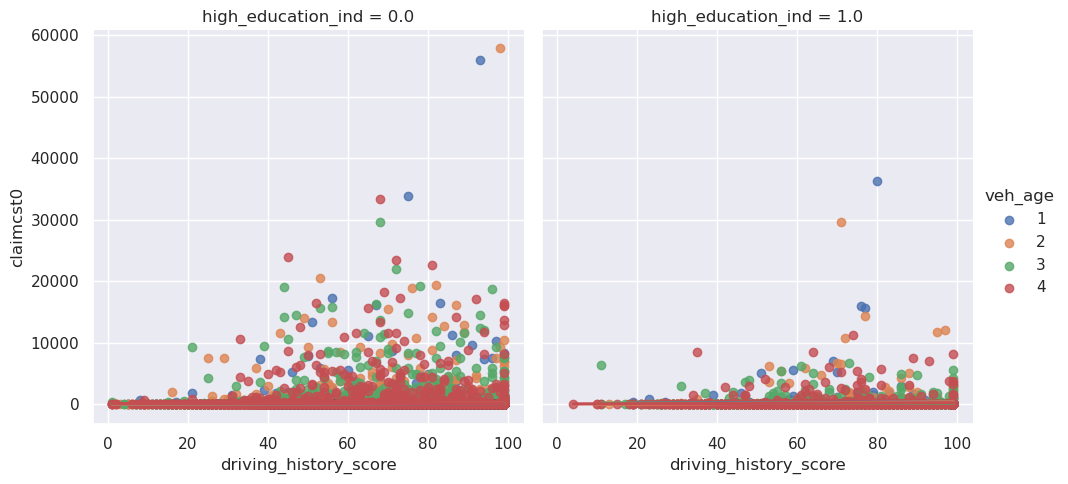

In [15]:
sns.lmplot(data=data, x="driving_history_score", y="claimcst0", col="high_education_ind", hue="veh_age")

<h2 style="color:CornflowerBlue"> Full ML Process </h2> 

---
1. _
2. _
3. Feature Engineering
4. _
5. _
6. Model Selection
7. Model Evaluation
8. Model Deployment
9. _

**Feature Engineering**

We can use feature engineering to generate more meaningful factors that contribute to the output variable. 
* identify factors that contribute to the output variable
* customer attributes (income segment, frequent purchase days)
* product attributes 
  * color, brand, style
* aggregated metrics - total past pruchases by category
* engineered features provide much clearer signals to predict customer tastes and purchase behavior
* Domain expertise helps create more informative features
* Feature selection ensure models are not overwhelmed by noisy inputs

1. [full guide to feature engineering](https://www.analyticsvidhya.com/blog/2021/09/complete-guide-to-feature-engineering-zero-to-hero/)
2. [Explorium.ai](https://www.explorium.ai/blog/machine-learning/feature-engineering/)

**Model Selection**
* Consider factors involved
  * type of output variable
  * how much data is available
  * How many features are being fed to the model
* For example, the recommendation algorithm chooses
  * collaborative filtering: analyzes customer similarity
  * Content-based: analyzes product similarity
  * Hybrid: combines collaborative and content-based filtering

1. [Medium - Guide to model selection](https://medium.com/atlas-research/model-selection-d190fb8bbdda)

<h2 style="color:CornflowerBlue"> Ken Jee - Walkthrough of Advanced Regression </h2> 

---

Using time efficiently - we want to make sure that we are looking at the most important variables and features of the data. We can look at a couple of features which we are most interesting, as well as our analysis to understand what we want to do.

We might also want to pull additional data into the dataset to improve the data quality.
Always start with a task list: 

1. Basic data cleaning and exploration
2. Exploratory data analysis (answering questions we have of the data)
3. Basic data engineering (Creating a pipeline for train and test sets)
4. Model experimentation and parameter tuning (linear regression, random foresst, XGBoost, MLP)
5. Feature Engineering
6. Ensembling
7. Submitting to the competition

<h3 style="color:LightSalmon"> Using ChatGPT for analysis </h3> 

ChatGPT may be used to help improve the anlaysis significantly.

In [3]:
# packages of use:
import pandas as pd
import numpy as np
# import plotly.graph_objects as go
# import plot.express as px
import scipy.stats as stats
from IPython.display import display, HTML
# use chatGPT to clean up the display code

In [4]:
data_path = "../../data/InsNova_data_2023_train.csv"

data = pd.read_csv(data_path)

In [5]:
def create_scrollable_table(data, table_id, title):
    html = f"<h3>{title}</h3>"
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += data.to_html()
    html += '</div>'
    return html

In [4]:
html_table = create_scrollable_table(data, "Dataset Features", "Dataset Featrues")
with open("html_table.html", "w") as f:
    f.write(html_table)

It may be useful to investigate specific variables and features in the dataset. For example, in housing price prediction, we may want to look specifically the year sold. 

We may also want to look for missing values in the data. In other words, we would want to get rid of variables which have a ton of missing values and get rid of the feature.

Sometimes though, it is actually useful to look at specific fields with null values!

<h3 style="color:LightSalmon"> Exploring the dependent variable </h3> 

* Should the response variable be normalized
* if so, normalize the response

Make sure to review the work of other people to see how they solve similar challenges and problems after trying your own thing.

I borrowed this procedure from the video below:

[ken jee kaggle walkthrough](https://www.youtube.com/watch?v=NQQ3DRdXAXE&list=PL2zq7klxX5AReJn7nZfqOKLZ3IpKj7fwc)

In [10]:
data.columns

Index(['id', 'veh_value', 'exposure', 'veh_body', 'veh_age', 'gender', 'area',
       'agecat', 'engine_type', 'max_power', 'driving_history_score',
       'veh_color', 'marital_status', 'e_bill', 'time_of_week_driven',
       'time_driven', 'trm_len', 'credit_score', 'high_education_ind', 'clm',
       'numclaims', 'claimcst0'],
      dtype='object')

In [6]:
import scipy.stats as stats
import plotly.graph_objects as go 
import plotly.express as px

mu, sigma = stats.norm.fit(data['claimcst0'])

# call a histogram object from plotly
hist_data = go.Histogram(x=data["claimcst0"], nbinsx=50, name="Histogram", opacity=0.75, histnorm="probability density", 
                         marker=dict(color="purple"))

# calculate a normal distribution based on fitted parameters
x_norm = np.linspace(data["claimcst0"].min(), data["claimcst0"].max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# create normal distribution overlay
norm_data = go.Scatter(x=x_norm, y=y_norm, mode="lines", name=f"Normal dist. (mu={mu:.2f}, sigma={sigma:.2f})", line=dict(color="green"))

# combine histogram and the overlay
fig = go.Figure(data=[hist_data, norm_data])
fig.update_layout(
    title="Claim Costs",
    xaxis_title="Claim Cost", 
    yaxis_title="Density",
    legend_title_text="Fitted Normal Distribution", 
    plot_bgcolor="rgba(32, 32, 32, 1)",
    paper_bgcolor="rgba(32, 32, 32, 1)", 
    font=dict(color="white")
)

<h4 style="color:DarkSeaGreen"> Reminder: NP-Plot Construction </h4>

A normal probability plot is constructed via the following procedure:
* **Sort** data in ascending order
* **Calculate** the **z-scores** for each data point
* **Plot** the **z-scores** on the vertical axis and the **corresponding ordered data** on the horizontal axis
* **Draw** a straight line through the points. If the data is normally distributed, the line will be straight!

In [21]:
# QQ Plot
# generate normal quantiles from the given data, return tuple of ndarrays containing the quantile data
qq_data = stats.probplot(data["claimcst0"], dist="norm")
# osm = qq_data[0]
# fitted normal values = qq_data[0][0] (y-axis)
# input values = qq_data[0][1] (x-axis)
print(qq_data[0][0])
print(qq_data[0][1])
print(qq_data[1])

[-4.00779612 -3.79311981 -3.6757129  ...  3.6757129   3.79311981
  4.00779612]
[    0.          0.          0.      ... 36312.62442 56003.82641
 57895.58456]
(413.9199403460884, 163.04808373789749, 0.3253718232702845)


In [22]:
qq_fig = px.scatter(x=qq_data[0][0], y=qq_data[0][1], labels={'x': 'Theoretical Quantiles', 'y': 'Ordered Values'}, 
                    color_discrete_sequence=["purple"])
qq_fig.update_layout(
    title="Q-Q plot",
    plot_bgcolor="rgba(32,32,32,1)",
    paper_bgcolor="rgba(32,32,32,1)",
    font=dict(color="white")
)
# calculate line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x
# add the line of best fit to the Q-Q plot
line_data = go.Scatter(x=line_x, y=line_y, mode="lines", name="Normal Line", line=dict(color="green"))
# Update the Q-Q plot with the normal line
# what does this add_trace thing do?

qq_fig.add_trace(line_data)
# Show the plots
qq_fig.show()

<h3 style="color:LightSalmon"> What Questions do we ask of the data? </h3>

There are many variables of interest here. 
* `id` is the policy key
* `veh_value` is the market value of the vehicle in $\$10,000\text{'s}$
* `exposure` basic unit of risk underlying an insurance premium
* `veh_body` is the type of a vehicle
* `veh_age` is the age of a vehicle (categorical) 1=youngest, 4=oldest
* `gender` is the gender of the driver
* `area` is driving area of residence
* `agecat` is the driver's age category from young (1) to old (6) 
* `engine_type` is the engine type of vehicles
* `max_power` is the maximum horsepower of a vehicle
* `driving_history_score` is the driving score based on past driving history (higher is better)
* `veh_color` is the color of the vehicle
* `martial_status` is an indicator whether or not someone is married
* `e_bill` is an indicator for paperlessbilling - 0=no, 1=yes
* `time_of_week_driven` indicates the most freuent driving time of the day
* `trm_len` is the term length for a given policy (6-month vs 12-month policies)
* `credit_score` credit-score
* `higher_education_ind` is an indicator of higher education
* `clm` indicator of claim
* `numclaims` number of claims which occur
* `claimcst0` is the claim amount

Questions to ask: 
1. is the vehicle value related to the cost of an insurance claim. If a claim occurred on a car, does the value of the vehicle affect the insurance premium?
2. how is the level of exposure related to the likelihood of a claim? How is exposure distributed across policies?
3. are certain types of vehicles more likely to result in a claim?
4. How does the age of a vehicle affect the claim cost?
5. Does the gender of the driver affect the likelihood of a claim?
6. Does the area of driving affect the cost of a claim? Does the area of residence affect the likelihood of a claim or the number of claims?
7. Is the age of the driver (`agecat`) a determining factor with regards to whether or not a claim is likely to be made, and how expensive that claim is likely to be.
8. Engine type only seems to be mentioning the kind of fuel used. These included
    * dissel - 4603
    * electric - 1763 (are these more expensive - is there a relationship between claim cost and the engine type?)
    * hybrid - 2107
    * petrol - 14146
9. is `max_power` related to the likelihood of a claim being made? In other words, are higher horsepower vehicles more likely to be involved in a claim incident?
10. is a higher `driving_history_score` correlated with a lower likelihood of a claim occurring or no?
11. are certain `veh_color`s related to a higher likelihood of a claim / higher number of claims?
12. Are accidents more likely to occur at different times of day > ie. is the probability of an accident greater at some time of the day, or does it not matter too much?
13. `weekday` - are accidents more likley to happen on a weekday or a weekend?
14. `credit_score` - is a higher credit score correlated with a reduced likelihood of a claim?
15. `higher_education_ind` - is someone highly educated less likely to file a claim?

In [14]:
data["time_driven"] = data["time_driven"].astype("category")
time_cat = data["time_driven"].value_counts()
fig = go.Figure(
    data=[go.Bar(
        x = time_cat.index.to_numpy(),
        y = time_cat
    )]
)
fig.update_layout(
    title="time of day when driving", 
    xaxis_title="time", 
    yaxis_title="frequency",
    plot_bgcolor="rgba(32, 32, 32, 1)",
    paper_bgcolor="rgba(32, 32, 32, 1)", 
    font=dict(color="white")
)

In [7]:
# the type of column "engine_type" is "O"
# let's check if there items of any type other than string in the column
data["engine_type"] = data["engine_type"].astype("category")
categories = data["engine_type"].cat.categories
# all 22619 observations are strings, so we can assume that these are all valid

In [8]:
categories = data["engine_type"].value_counts()
categories

engine_type
petrol      14146
dissel       4603
hybrid       2107
electric     1763
Name: count, dtype: int64

In [9]:
num_engine_type = data["engine_type"].value_counts()

fig = go.Figure(
    data=[go.Bar(
        x = categories.index.to_numpy(),
        y = categories
    )]
)
fig.show()

In [12]:
fig = go.Figure(
    data=[go.Histogram(
       x=data["max_power"], nbinsx=100, name="max horsepower histogram", opacity=0.75, 
       marker=dict(color="purple")
    )]
)
fig.update_layout(
    title="maximum horsepower histogram",
    xaxis_title="horsepower", 
    yaxis_title="frequency",
    plot_bgcolor="rgba(32, 32, 32, 1)",
    paper_bgcolor="rgba(32, 32, 32, 1)", 
    font=dict(color="white")
)
fig.show()
# the vast majority of cars have a horsepower less than 200 hp
# are cars with more than 200 horsepower more likely to result in a claim?
# run logistic regression for this problem

What is the average claim cost by vehicle value?

In [34]:
# 1. Distribution of vehicle values and claims and their relation to claim cost
claim_costs_1 = data.loc[data['clm']==1]
claim_costs_0 = data.loc[data['clm']==0]

costs_fig = px.scatter(claim_costs_1, x="veh_value", y="claimcst0")
costs_fig.show()

costs_fig_2 = px.scatter(claim_costs_0, x="veh_value", y="claimcst0")
costs_fig_2.show()

In [39]:
vehicle_values = data.groupby("clm")["veh_value"].mean()
fig6 = px.bar(x=vehicle_values.index, y=vehicle_values.values, 
              title="Average vehicle value by whether or not a claim occurred", 
              template="plotly_dark", text=vehicle_values.values, 
              color_discrete_sequence=["purple", "green"])
fig6.update_traces(textposition="outside")
fig6.update_yaxes(title="vehicle value")
fig6.update_xaxes(title="claim occurrence (0=False | 1=True)")
fig6.show()

The claim cost is not strongly correlated to the vehicle value, even if a claim is made. 99% of claims hover around the low end of vehicle value distribution, simply because there are more cars of a lower value.

**relationship of exposure to the likelihood of a claim?**

In [41]:
# average exposure by claim occurrence
policy_exposures = data.groupby("clm")["exposure"].mean()
color_exposures = np.where(policy_exposures.index == 0, "purple", "green")
fig7 = px.bar(x=policy_exposures.index, y=policy_exposures.values, 
              title="Average exposure by whether or not a claim occurred", 
              template="plotly_dark", text=policy_exposures.values, 
              color=color_exposures,
              color_discrete_sequence=["purple", "green"])
fig7.update_traces(textposition="outside")
fig7.update_yaxes(title="exposure level")
fig7.update_xaxes(title="claim occurrence (0=False | 1=True)")
fig7.show()

In [45]:
# 4. How does the age of a vehicle affect the claim cost?
fig8_vals = data.loc[data["clm"]==1]
fig8_vals = fig8_vals.groupby("veh_age")["claimcst0"].mean()
fig8 = px.bar(x=fig8_vals.index, y=fig8_vals.values)
fig8.show()

In [46]:
# does the gender of the driver affect the likelihood of a claim?

In [47]:
# Does the area of driving affect the likelihood of a claim?

In [48]:
# Is the age of the driver a determining factor with regards to whether or not a claim is likely to be made?

In [49]:
# Is `max_power` related to the likelihood of a claim being made? In other words, are higher horsepower vehicles more likely to be involved in a claim incident?

In [50]:
# is a higher driving histroy score correlated with a lower likelihood of a claim occurring?

In [51]:
# are certain vehicle colors related to a higher likelihood of a claim being made, or a higher number of 
# claims occurring?

In [52]:
# Are accidents more likely to occur at different times of day? Is the probability of an accident greater 
# at some time of the day than another?

In [53]:
# Are accidents / claims more likely to happen on a weekday or a weekend?

In [54]:
# Is a higher credit score related to a reduced likelihood of a claim or no?

In [55]:
# is a highly educated individual less or more likely to file a claim?

In [58]:
data["claimcst0"].dtype

dtype('float64')